# TensorFlow Linear Regression Hyperparameters

## Creating Data with 1 million points

In [1]:
import tensorflow as tf
tf.__version__

'1.3.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1 Million Points spaced between 0 and 10
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
# y = mx + b + noise_levels
m_true=0.5
b_true = 5

y_true =  (m_true * x_data ) + b_true + noise

### Create a DataFrame with the data

In [6]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [7]:
my_data.head()

,X Data,Y
0,0.00000,5.771066
1,0.00001,7.357846
2,0.00002,6.022716
3,0.00003,4.349052
4,0.00004,2.972465


### Sample 250 random points and plot (not the entire dataset because that will take too much time)

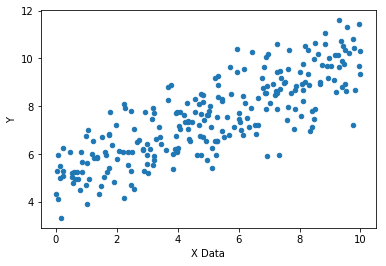

In [8]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## tf.estimator API

### Define a feature column and the estimator object containing it (ignore any warning message)

In [9]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [78]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Tirtha\\AppData\\Local\\Temp\\tmpl9yb_a04', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


### Train/Test Split using scikit-learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [13]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [79]:
def get_input_fn_from_numpy(x_data,y_data=None, batch_size=4,num_epochs=None, shuffle=True):
  return tf.estimator.inputs.numpy_input_fn(
      x={'x':x_data},
      y=y_data,
      batch_size=batch_size,
      num_epochs=num_epochs,
      shuffle=shuffle)

### Train the Estimator with small number of steps (say 10)

In [80]:
estimator.train(input_fn=get_input_fn_from_numpy(x_train,y_train, shuffle=True),steps=10)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Tirtha\AppData\Local\Temp\tmpl9yb_a04\model.ckpt.
INFO:tensorflow:loss = 294.229, step = 1
INFO:tensorflow:Saving checkpoints for 10 into C:\Users\Tirtha\AppData\Local\Temp\tmpl9yb_a04\model.ckpt.
INFO:tensorflow:Loss for final step: 64.1237.


### Predictions and plotting the fitted line (it is likely to be a bad fit)

In [81]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)
predictions = []
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Tirtha\AppData\Local\Temp\tmpl9yb_a04\model.ckpt-10


In [82]:
predictions=np.array(predictions)

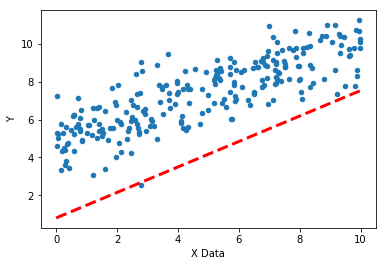

In [86]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r--',lw=3)

### Calculating the slope of the predicted line by least-square fit

In [89]:
def linear_model(predictions):
    
    x=np.linspace(0,10,10)
    y=predictions
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    return (m,c)

m,c = linear_model(predictions)

print("Slope of the fitted line:", round(float(m),3))
print("Intercept of the fitted line:", round(float(c),3))
print("Remember the true slope is 0.5 and true intercept is 5")

Slope of the fitted line: 0.672
Intercept of the fitted line: 0.809
Remember the true slope is 0.5 and true intercept is 5


## Hyperparameters: Batch size, training steps, num_epochs

### Increasing the training steps

In [ ]:
step_n = [1,2,5,10,15,20,35,50,75,100,200,300,500,700,1000,1200,1500,2000]
slope_n=[]
intercept_n=[]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
for i in step_n:
    
    estimator.train(input_fn=get_input_fn_from_numpy(x_train,y_train, shuffle=True),steps=i)
    predictions = []
    for x in estimator.predict(input_fn=input_fn_predict):
        predictions.append(x['predictions'])

    m,c = linear_model(predictions)
    slope_n.append(m)
    intercept_n.append(c)

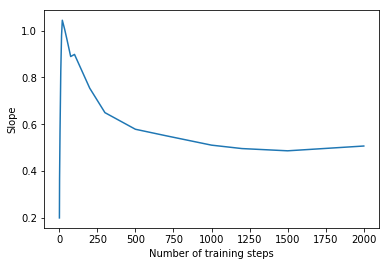

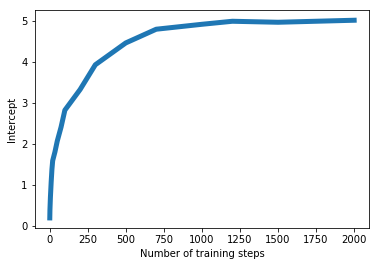

In [62]:
plt.xlabel("Number of training steps")
plt.ylabel("Slope")
plt.plot(step_n,slope_n)
plt.figure()
plt.xlabel("Number of training steps")
plt.ylabel("Intercept")
plt.plot(step_n,intercept_n,lw=5)

### Varying training steps with large batch size

In [ ]:
step_n = [1,2,5,10,15,20,35,50,75,100,200,300,500,700,1000,1200,1500,2000]
slope_large_batch=[]
intercept_large_batch=[]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
for i in step_n:
    
    estimator.train(input_fn=get_input_fn_from_numpy(x_train,y_train, batch_size=100,shuffle=True),steps=i)
    predictions = []
    for x in estimator.predict(input_fn=input_fn_predict):
        predictions.append(x['predictions'])

    m,c = linear_model(predictions)
    slope_large_batch.append(m)
    intercept_large_batch.append(c)

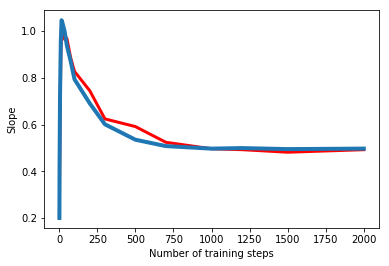

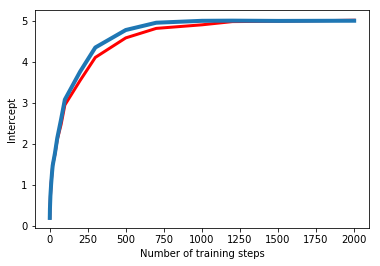

In [69]:
plt.figure()
plt.xlabel("Number of training steps")
plt.ylabel("Slope")
plt.plot(step_n,slope_n,'r-',lw=3)
plt.plot(step_n,slope_large_batch,lw=4)
plt.figure()
plt.xlabel("Number of training steps")
plt.ylabel("Intercept")
plt.plot(step_n,intercept_n,'r-',lw=3)
plt.plot(step_n,intercept_large_batch,lw=4)

### Varying training steps with different *num_epochs*

In [ ]:
step_n = [1,2,5,10,15,20,35,50,75,100,200,300,500,700,1000,1200,1500,2000]
slope_small_epoch=[]
intercept_small_epoch=[]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
for i in step_n:
    
    estimator.train(input_fn=get_input_fn_from_numpy(x_train,y_train, num_epochs=5,shuffle=True),steps=i)
    predictions = []
    for x in estimator.predict(input_fn=input_fn_predict):
        predictions.append(x['predictions'])

    m,c = linear_model(predictions)
    slope_small_epoch.append(m)
    intercept_small_epoch.append(c)

In [ ]:
step_n = [1,2,5,10,15,20,35,50,75,100,200,300,500,700,1000,1200,1500,2000]
slope_large_epoch=[]
intercept_large_epoch=[]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
for i in step_n:
    
    estimator.train(input_fn=get_input_fn_from_numpy(x_train,y_train, num_epochs=500,shuffle=True),steps=i)
    predictions = []
    for x in estimator.predict(input_fn=input_fn_predict):
        predictions.append(x['predictions'])

    m,c = linear_model(predictions)
    slope_large_epoch.append(m)
    intercept_large_epoch.append(c)

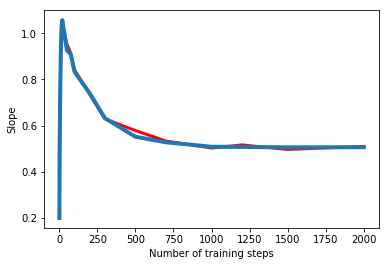

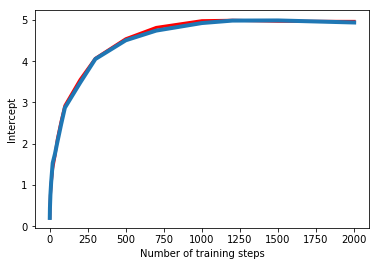

In [72]:
plt.figure()
plt.xlabel("Number of training steps")
plt.ylabel("Slope")
plt.plot(step_n,slope_small_epoch,'r-',lw=3)
plt.plot(step_n,slope_large_epoch,lw=4)
plt.figure()
plt.xlabel("Number of training steps")
plt.ylabel("Intercept")
plt.plot(step_n,intercept_small_epoch,'r-',lw=3)
plt.plot(step_n,intercept_large_epoch,lw=4)

### For the simple linear regression with standard normal noise, batch size or number of epochs do not make a difference in the quality of predictor. Only training steps matter